### Implementing different open boundary conditions for wave equation

In [9]:
import numpy as np
import matplotlib.pylab as plt

#### class that collects different RHS with boundaries

In [10]:
class RHS:

    @staticmethod
    def rhs_periodic(phi, pi, x, N, ng):
        """
        Basic periodic boundary conditions
        :param phi: solution at a time 't' (state vector)
        :param pi: 1st derivative of the solution (state vector)
        :param x: grid array (including ghosts)
        :param N: Number of physical points
        :param ng: Number of ghosts
        :return: dot_phi: derivative in time of the solution at time 't'
                 dot_pi: 2nd derivative of the solution at a time 't'
        """

        n = N + 2 * ng  # total number of points
        phi_dot = np.zeros_like(x)  # assign memory to the solution
        pi_dot = np.zeros_like(x)  # assign memory to the solution

        d2_phi = np.zeros_like(x)  # temporary storage for 2nd derivative of phi

        dx = x[1] - x[0]  # grid spacing
        idx = 1. / dx

        # boundary conditions -> filling ghosts [staggered grid]
        phi[0] = phi[n - 3]  # left boundary
        phi[n - 1] = phi[2]  # right boundary
        pi[0] = pi[n - 3]
        pi[n - 1] = pi[2]

        # compute the right hand side
        for i in range(ng, N + ng):
            d2_phi[i] = idx * idx * (phi[i + 1] + phi[i - 1] - 2 * phi[i])  # finite differencing
            phi_dot[i] = pi[i]
            pi_dot[i] = d2_phi[i]

        return phi_dot, pi_dot

    @staticmethod
    def rhs_ghostextrap(phi, pi, x, N, ng):
        """
        Ghosts are filled with linear extrapolation
        :param phi: solution at a time 't' (state vector)
        :param pi: 1st derivative of the solution (state vector)
        :param x: grid array (including ghosts)
        :param N: Number of physical points
        :param ng: Number of ghosts
        :return: dot_phi: derivative in time of the solution at time 't'
                 dot_pi: 2nd derivative of the solution at a time 't'
        """

        n = N + 2 * ng  # total number of points
        phi_dot = np.zeros_like(x)  # assign memory to the solution
        pi_dot = np.zeros_like(x)  # assign memory to the solution

        d2_phi = np.zeros_like(x)  # temporary storage for 2nd derivative of phi

        dx = x[1] - x[0]  # grid spacing
        idx = 1. / dx

        for p in phi, pi:
            # p[0] = interpolate.interp1d(x[1:-2], p[1:-2], kind="linear", bounds_error=False)(x[0])
            # p[-1] = interpolate.interp1d(x[1:-2], p[1:-2], kind="linear", bounds_error=False)(x[-1])
            p[n - 1] = p[n - 2] + (x[n - 1] - x[n - 3]) / (x[n - 2] - x[n - 3]) * (p[n - 2] - p[n - 3])
            p[0] = p[1] + (x[0] - x[2]) / (x[1] - x[2]) * (p[1] - p[2])

        # # boundary conditions -> filling ghosts [staggered grid]
        # phi[0] = phi[n-3] # left boundary
        # phi[n-1] = phi[2] # right boundary
        # pi[0] = pi[n-3]
        # pi[n-1] = pi[2]

        # compute the right hand side
        for i in range(ng, N + ng):
            d2_phi[i] = idx * idx * (phi[i + 1] + phi[i - 1] - 2 * phi[i])  # finite differencing
            phi_dot[i] = pi[i]
            pi_dot[i] = d2_phi[i]

        return phi_dot, pi_dot

    @staticmethod
    def rhs_advection_ghostextrap(phi, pi, x, N, ng):
        """
        Last physcial point is filled with advection equation,
        Ghosts are filled with linear extrapolation
        :param phi: solution at a time 't' (state vector)
        :param pi: 1st derivative of the solution (state vector)
        :param x: grid array (including ghosts)
        :param N: Number of physical points
        :param ng: Number of ghosts
        :return: dot_phi: derivative in time of the solution at time 't'
                 dot_pi: 2nd derivative of the solution at a time 't'
        """

        n = N + 2 * ng  # total number of points
        phi_dot = np.zeros_like(x)  # assign memory to the solution
        pi_dot = np.zeros_like(x)  # assign memory to the solution

        d2_phi = np.zeros_like(x)  # temporary storage for 2nd derivative of phi

        dx = x[1] - x[0]  # grid spacing
        idx = 1. / dx

        # d/dt phi +- d/dx phi = 0
        # for i = 1 and i = n-2

        for p in phi, pi:
            # p[0] = interpolate.interp1d(x[1:-2], p[1:-2], kind="linear", bounds_error=False)(x[0])
            # p[-1] = interpolate.interp1d(x[1:-2], p[1:-2], kind="linear", bounds_error=False)(x[-1])
            p[n - 1] = p[n - 2] + (x[n - 1] - x[n - 3]) / (x[n - 2] - x[n - 3]) * (p[n - 2] - p[n - 3])
            p[0] = p[1] + (x[0] - x[2]) / (x[1] - x[2]) * (p[1] - p[2])

        # # boundary conditions -> filling ghosts [staggered grid]
        # phi[0] = phi[n-3] # left boundary
        # phi[n-1] = phi[2] # right boundary
        # pi[0] = pi[n-3]
        # pi[n-1] = pi[2]

        # compute the right hand side
        for i in range(ng, N + ng):
            d2_phi[i] = idx * idx * (phi[i + 1] + phi[i - 1] - 2 * phi[i])  # finite differencing
            phi_dot[i] = pi[i]
            pi_dot[i] = d2_phi[i]

        phi_dot[ng] = idx * ((-1. / 2.) * phi[ng - 1] + (1. / 2.) * phi[ng + 1])
        phi_dot[N] = - idx * ((-1. / 2.) * phi[N - 1] + (1. / 2.) * phi[N + 1])

        return phi_dot, pi_dot

    @staticmethod
    def rhs_characteristis_ghostextrap(phi, pi, x, N, ng):
        """
        Ghosts are filled with advection equation (one-sided stencils)
        :param phi: solution at a time 't' (state vector)
        :param pi: 1st derivative of the solution (state vector)
        :param x: grid array (including ghosts)
        :param N: Number of physical points
        :param ng: Number of ghosts
        :return: dot_phi: derivative in time of the solution at time 't'
                 dot_pi: 2nd derivative of the solution at a time 't'
        """

        n = N + 2 * ng  # total number of points
        phi_dot = np.zeros_like(x)  # assign memory to the solution
        pi_dot = np.zeros_like(x)  # assign memory to the solution

        d2_phi = np.zeros_like(x)  # temporary storage for 2nd derivative of phi

        dx = x[1] - x[0]  # grid spacing
        idx = 1. / dx

        # d/dt phi +- d/dx phi = 0
        # for i = 1 and i = n-2

        # eq. 21 22 in arxiv:0509119
        i = 0
        phi[i] = phi[i + 2] - 2 * dx * pi[i + 1]
        pi[i] = 2 * pi[i + 1] - pi[i + 2]

        i = n - 1
        phi[i] = phi[i - 2] - 2 * dx * pi[i - 1]
        pi[i] = 2 * pi[i - 1] - pi[i - 2]

        # # boundary conditions -> filling ghosts [staggered grid]
        # phi[0] = phi[n-3] # left boundary
        # phi[n-1] = phi[2] # right boundary
        # pi[0] = pi[n-3]
        # pi[n-1] = pi[2]

        # compute the right hand side
        for i in range(ng, N + ng):
            d2_phi[i] = idx * idx * (phi[i + 1] + phi[i - 1] - 2 * phi[i])  # finite differencing
            phi_dot[i] = pi[i]
            pi_dot[i] = d2_phi[i]

        return phi_dot, pi_dot

#### time integrator 

In [11]:
def rk4(phi, pi, rhs, dt, x, N, ng):
    """
    Performs the time interation via Runge-Kutta 4th order method
    Requires: time-step 'dt', solution at time 't' and the right-hand side
    of the equation
    :param phi: Solution at time 't'
    :param pi: 1st derivative of the solution
    :param rhs: right-hand side of the equation, rhs(phi, pi, x, N, ng )
    :param dt: time-step
    :param x: x-grid, including ghosts
    :param N: number of physical points
    :param ng: number of ghost points
    :return: phi, pi
    """
    # give memory to temporary arrays
    tmp_phi = np.zeros_like(phi)
    tmp_pi = np.zeros_like(pi)

    # first RK step
    k1, l1 = rhs(phi, pi, x, N, ng)
    tmp_phi = k1 * 0.5 * dt + phi
    tmp_pi = l1 * 0.5 * dt + pi
    # second step
    k2, l2 = rhs(tmp_phi, tmp_pi, x, N, ng)
    tmp_phi = k2 * 0.5 * dt + phi
    tmp_pi = l2 * 0.5 * dt + pi
    # third step
    k3, l3 = rhs(tmp_phi, tmp_pi, x, N, ng)
    tmp_phi = k3 * dt + phi
    tmp_pi = l3 * dt + pi
    # forth step
    k4, l4 = rhs(tmp_phi, tmp_pi, x, N, ng)

    # combine all steps
    phi = phi + (1. / 6.) * dt * (k1 + 2. * (k2 + k3) + k4)
    pi = pi + (1. / 6.) * dt * (l1 + 2. * (l2 + l3) + l4)

    return phi, pi

#### Initial data (gaussian packaet)

In [12]:
def gaussian(x, t, a=1.):
    phi  = np.exp(-a * (x-t) ** 2.)
    pi = 2 * a * (x - t) * np.exp(-a * (x-t)**2)
    return phi,  pi # np.zeros(len(phi))

#### evolution of the gaussial packaet (analytic solution)

In [13]:
def evolve_analytical_solution(x_arr, t_arr):
    anal_final = []
    phi = []
    for i, t in enumerate(t_arr):
        _t = np.zeros(len(x_arr))
        _t.fill(t)
        phi, _ = gaussian(x_arr, _t)
        anal_final.append(phi)
    anal_final = np.reshape(anal_final, (len(t_arr), len(x_arr)))
    return anal_final

#### Solver

In [17]:
def solve(rhs, N=101, ng=1, xmin=-1., xmax=1., dtdx=0.5,tmax=1.):
    # finide differencing settings
    # N = 101  # physical grid
    # ng = 1  # ghosts
    # xmin = -1
    # xmax = 1
    #
    n = N + 2 * ng  # all points
    dx = (xmax - xmin) / np.float(N - 1)  # spacing
    x = np.arange(start=xmin - dx, stop=xmax + dx + dx, step=dx)
    # x = -dx + xmin + dx * np.arange(n)
    # print(x); exit(1)
    # runge-kutta settings
    dt = dtdx * dx  # stable timestep
    # tmax = 1.
    assert dt < tmax
    res_phi = []
    res_pi = []
    res_t = np.array(np.arange(start=0, stop=tmax, step=dt))
    # initial profile
    phi, pi = gaussian(x, np.zeros(len(x)))
    #
    # print("Computing...")
    phi_ = phi  # setting initial profiles
    pi_ = pi  # setting initial profiles
    for i, time in enumerate(res_t):
        if i == 0: # append the 0th solution
            res_phi = np.append(res_phi, phi_[ng:n - ng])
            res_pi = np.append(res_pi, pi_[ng:n - ng])
        else:
            phi_, pi_ = rk4(phi_, pi_, rhs, dt, x, N, ng)
            res_phi = np.append(res_phi, phi_[ng:n - ng])
            res_pi = np.append(res_pi, pi_[ng:n - ng])
        #
        # print('{}/{} time: {} res: {} x:{}'.format(i + 1, len(res_t), time, len(phi), len(x)))
    #

    res_phi = np.reshape(res_phi, (len(res_t), len(x[ng:n - ng])))

    print("returning: {} {} {} {}".format(x.shape, res_t.shape, res_phi.shape, res_pi.shape))
    return x[ng:n - ng], res_t, res_phi, res_pi

#### Plot solution computed with different methods

In [18]:
def task_1_solution_at_different_times(axes, rhs, label=True, ls='-'):
    list_times = [0., 0.5, 2.]
    list_dtdx = [0.5]#, 1., 1.1]
    colors = ["blue", "orange", "red"]
    #rhs = RHS.rhs_characteristis_ghostextrap
    list_resolutions = [101]
    lss = [ls]

    res = {}

    for dxdt in list_dtdx:
        res[dxdt] = {}
        for npoints in list_resolutions:
            res[dxdt][npoints] = {}
            x_arr, res_t, res_phi, _ = solve(rhs, N=npoints, ng=1, xmin=-2.5, xmax=2.5, dtdx=dxdt, tmax=2.0)
            anal_final1 = evolve_analytical_solution(x_arr, res_t)
            res[dxdt][npoints]["x_arr"] = x_arr
            res[dxdt][npoints]["res_t"] = res_t
            res[dxdt][npoints]["res_phi"] = res_phi
            res[dxdt][npoints]["phi_anal"] = anal_final1
    # print("computed")

    for dxdt, color in zip(list_dtdx, colors):
        for npoints, ls in zip(list_resolutions, lss):

            x_arr = res[dxdt][npoints]["x_arr"]
            res_t = res[dxdt][npoints]["res_t"]
            res_phi = res[dxdt][npoints]["res_phi"]
            phi_anal = res[dxdt][npoints]["phi_anal"]

            for ax, time in zip(axes, list_times):

                idx = find_nearest_index(res_t, time)
                x = x_arr
                phi = res_phi[idx]
                phi_a = phi_anal[idx]

                if label is None:
                    ax.plot(x, phi, color=color, ls=ls, label='n:{} dt/dx:{}'.format(npoints, dxdt))
                else:
                    ax.plot(x, phi, color=color, ls=ls, label='n:{} dt/dx:{} {}'.format(npoints, dxdt, label))#, label='n:{} dt/dx:{}'.format(npoints, dxdt))

                ax.plot(x, phi_a, color='gray', ls=':', lw=1.)  # , label='n:{} dt/dx:{}'.format(npoints, dxdt))

returning: (103,) (80,) (80, 101) (8080,)
returning: (103,) (80,) (80, 101) (8080,)
returning: (103,) (80,) (80, 101) (8080,)


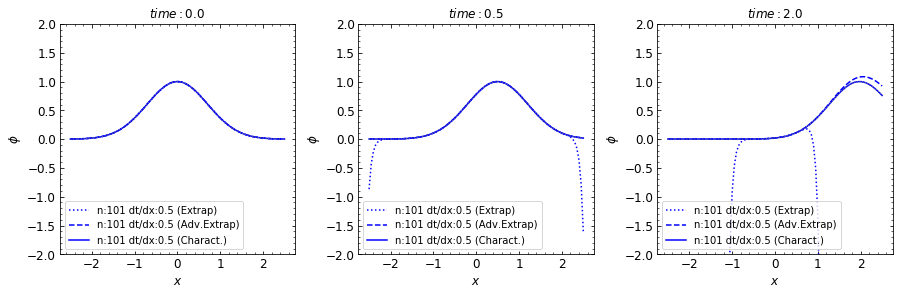

In [20]:
def find_nearest_index(array, value):
    ''' Finds index of the value in the array that is the closest to the provided one '''
    idx = (np.abs(array - value)).argmin()
    return idx

list_times = [0., 0.5, 2.]
fig, axes = plt.subplots(nrows=1, ncols=len(list_times), sharey='all', figsize=(12.6, 4.2))
if len(list_times) == 1:
    axes = [axes]

task_1_solution_at_different_times(axes, RHS.rhs_ghostextrap, label="(Extrap)", ls=':')
task_1_solution_at_different_times(axes, RHS.rhs_advection_ghostextrap, label="(Adv.Extrap)", ls="--")
task_1_solution_at_different_times(axes, RHS.rhs_characteristis_ghostextrap, label="(Charact.)", ls="-")

for ax, time in zip(axes, list_times):
    ax.set_title("$time:{}$".format(time))
    ax.set_xlabel("$x$", fontsize='large')
    ax.set_ylabel("$\phi$", fontsize='large')
    ax.tick_params(
        axis='both', which='both', labelleft=True,
        labelright=False, tick1On=True, tick2On=True,
        labelsize=int(12),
        direction='in',
        bottom=True, top=True, left=True, right=True
    )
    ax.minorticks_on()
    ax.legend(loc="lower left", ncol=1)
    ax.set_ylim(-2., 2.)
plt.tight_layout()
# plt.subplots_adjust(hspace=0.2)
# plt.subplots_adjust(wspace=0.0)
# plt.savefig(FIGPATH + "solution_at_different_times.png", dpi=128)
plt.show()

#### self-convergence with open boundaries

In [25]:
def self_convergence(num_phi1, num_phi2, num_phi4):

    print(len(num_phi1), len(num_phi2), len(num_phi4))

    num_phi2 = num_phi2[::2]
    num_phi4 = num_phi4[::4]
    diffs1 = []
    diffs2 = []
    norms = []
    for i in range(len(num_phi1)):
        sol_num = num_phi1[i]
        sol_num_2 = num_phi2[i]
        sol_num_4 = num_phi4[i]
        #
        diff1 = np.abs(sol_num - sol_num_2[::2])  # same length
        diff2 = np.abs(sol_num_2 - sol_num_4[::2])[::2]  # same length
        # print("self_conv diff1: {:d} diff2: {:d}".format(len(diff1), len(diff2)))
        #
        norm2 = np.log2(np.sqrt(np.sum(diff1 ** 2)) / np.sqrt(np.sum(np.abs(diff2 ** 2))))
        #
        diffs1.append(diff1)
        diffs2.append(diff2)
        norms.append(norm2)
    return diffs1, diffs2, norms

returning: (103,) (80,) (80, 101) (8080,)
returning: (203,) (160,) (160, 201) (32160,)
returning: (403,) (320,) (320, 401) (128320,)
(80, 160, 320)
returning: (103,) (40,) (40, 101) (4040,)
returning: (203,) (80,) (80, 201) (16080,)
returning: (403,) (160,) (160, 401) (64160,)
(40, 80, 160)
returning: (103,) (37,) (37, 101) (3737,)
returning: (203,) (73,) (73, 201) (14673,)
returning: (403,) (146,) (146, 401) (58546,)
(37, 73, 146)


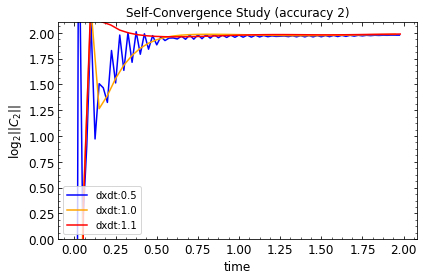

In [26]:
# solution at one reoslution
list_dtdx = [0.5, 1., 1.1]
colors = ["blue", "orange", "red"]
time_arrays = []
norm2_arrays = []
rhs = RHS.rhs_characteristis_ghostextrap
for dxdt in list_dtdx:
    x_arr, res_t, res_phi, _ = solve(rhs, N=101, ng=1, xmin=-2.5, xmax=2.5, dtdx=dxdt, tmax=2.0)
    x_arr2, res_t2, res_phi2, _ = solve(rhs, N=201, ng=1, xmin=-2.5, xmax=2.5, dtdx=dxdt, tmax=2.0)
    x_arr4, res_t4, res_phi4, _ = solve(rhs, N=401, ng=1, xmin=-2.5, xmax=2.5, dtdx=dxdt, tmax=2.0)

    diffs1, diffs2, norms = self_convergence(res_phi, res_phi2, res_phi4)
        
    time_arrays.append(res_t)
    norm2_arrays.append(norms)
# plotting
fig, ax = plt.subplots(nrows=1, ncols=1)
for time_arr, norm2, color, dxdt in zip(time_arrays, norm2_arrays, colors, list_dtdx):
    ax.plot(time_arr, norm2, color=color, ls='-', label='dxdt:{}'.format(dxdt))

# ax.set_yscale("log")
ax.set_xlabel("time", fontsize='large')
# ax.set_ylabel()
ax.tick_params(
    axis='both', which='both', labelleft=True,
    labelright=False, tick1On=True, tick2On=True,
    labelsize=int(12),
    direction='in',
    bottom=True, top=True, left=True, right=True
)
ax.set_ylabel("$\log_2 ||C_2||$", fontsize='large')
ax.minorticks_on()
ax.set_title("Self-Convergence Study (accuracy 2)")
ax.set_ylim(0, 2.1)
ax.legend(loc="lower left", ncol=1)
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.2)
# plt.savefig(FIGPATH + "self_convergence_dxdt.png", dpi=128)
plt.tight_layout()
plt.show()
